In [17]:
library(latex2exp)

# String tension analysis

In [18]:
results <- read.csv("..\\data\\comp_energy_results.csv", header = TRUE, sep = ",")

d <- results[, c("index", "temp", "x", "comptype")]
colnames(d) <- c("index", "temp", "size", "comptype")

for (i in 1:nrow(d)) d$width[i] <- unlist(strsplit(unlist(strsplit(d$comptype[i], " "))[2], "x"))[1]

bin_size <- 8

energy <- c()
energy_err <- c()
for (index in d$index) {
	res <- read.csv(paste("..\\data\\comp_energy_stats\\energy_", index, "_stats.csv", sep = ""), header = TRUE, sep = ",")
	energy <- append(energy, res$energy[res$bin_size == bin_size])
	energy_err <- append(energy_err, res$energy_err[res$bin_size == bin_size])
}

d$energy <- energy
d$energy_err <- energy_err
d$energy_err_perc <- d$energy_err / d$energy
d$energy_scaled <- d$energy / d$size #/ d$size / d$size
d$energy_scaled_err <- d$energy_scaled * d$energy_err_perc

d <- d[order(d$temp), ]

d$width <- as.integer(d$width)
wilson <- na.omit(d)
free <- d[is.na(d$width), ]
free <- free[, !names(free) %in% c("width")]
wilson <- wilson[order(wilson$width),]

for (i in 1:nrow(wilson)) {
	size <- wilson$size[i]
	temp <- wilson$temp[i]
	wilson$energy[i] <- wilson$energy[i] - free$energy[free$size == size & free$temp == temp]
	wilson$energy_scaled[i] <- wilson$energy_scaled[i] - free$energy_scaled[free$size == size & free$temp == temp]
}
wilson$width_perc <- wilson$width / wilson$size

wilson
free

Warning message in eval(expr, envir, enclos):
"NAs durch Umwandlung erzeugt"


,index,temp,size,comptype,width,energy,energy_err,energy_err_perc,energy_scaled,energy_scaled_err,width_perc
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6057,0.20,16,1 2x16 Wilson Metropolis Simulations,2,3.892951,0.05939869,8.651598e-05,0.2433095,0.003712418,0.1250000
5,6061,0.21,16,1 2x16 Wilson Metropolis Simulations,2,4.199382,0.06483622,9.440860e-05,0.2624614,0.004052264,0.1250000
9,6065,0.22,16,1 2x16 Wilson Metropolis Simulations,2,4.419718,0.05859397,8.532184e-05,0.2762323,0.003662123,0.1250000
13,6069,0.23,16,1 2x16 Wilson Metropolis Simulations,2,4.653436,0.06293568,9.161225e-05,0.2908398,0.003933480,0.1250000
17,6073,0.24,16,1 2x16 Wilson Metropolis Simulations,2,4.796413,0.06288872,9.153608e-05,0.2997758,0.003930545,0.1250000
21,6077,0.25,16,1 2x16 Wilson Metropolis Simulations,2,5.144867,0.05325618,7.755144e-05,0.3215542,0.003328511,0.1250000
25,6081,0.26,16,1 2x16 Wilson Metropolis Simulations,2,5.393252,0.06416722,9.353489e-05,0.3370782,0.004010451,0.1250000
29,6085,0.27,16,1 2x16 Wilson Metropolis Simulations,2,5.690423,0.06192074,9.035940e-05,0.3556514,0.003870046,0.1250000
33,6089,0.28,16,1 2x16 Wilson Metropolis Simulations,2,5.933794,0.05947980,8.698837e-05,0.3708621,0.003717487,0.1250000


,index,temp,size,comptype,energy,energy_err,energy_err_perc,energy_scaled,energy_scaled_err
,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,6060,0.20,16,1 Metropolis Simulations,682.6703,0.1282457,1.878589e-04,42.66689,0.008015355
44,6100,0.20,24,1 Metropolis Simulations,2303.6129,0.2403703,1.043449e-04,95.98387,0.010015428
84,6140,0.20,36,1 Metropolis Simulations,7775.6287,0.4117625,5.295553e-05,215.98969,0.011437848
124,6180,0.20,54,1 Metropolis Simulations,26239.4959,0.8664607,3.302124e-05,485.91659,0.016045568
8,6064,0.21,16,1 Metropolis Simulations,682.5624,0.1147586,1.681291e-04,42.66015,0.007172414
48,6104,0.21,24,1 Metropolis Simulations,2303.5277,0.2532093,1.099224e-04,95.98032,0.010550389
88,6144,0.21,36,1 Metropolis Simulations,7774.8024,0.4328037,5.566749e-05,215.96673,0.012022326
128,6184,0.21,54,1 Metropolis Simulations,26236.2646,0.8133134,3.099959e-05,485.85675,0.015061360
12,6068,0.22,16,1 Metropolis Simulations,682.3209,0.1410494,2.067201e-04,42.64505,0.008815589


## Energy of the free theory

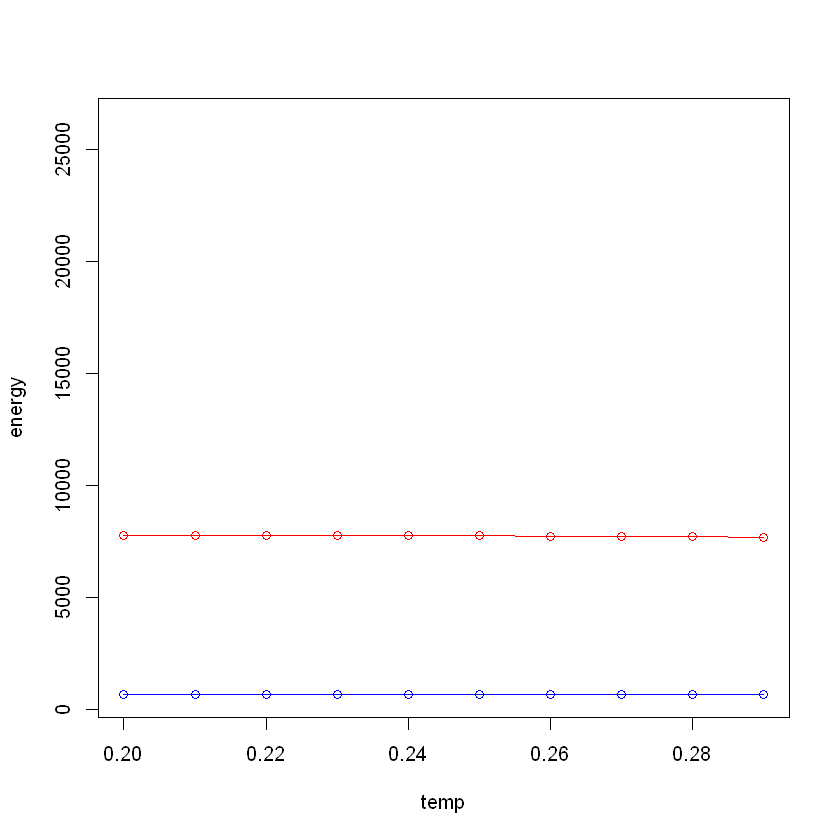

In [19]:
entries <- data.frame(list(
	size = c(16, 36),
	col = c("blue", "red")
))

d <- free

plot(NULL, xlim = c(min(d$temp), max(d$temp)),
	ylim = c(min(d$energy), max(d$energy)),
	xlab = "temp", ylab = "energy")
for (i in 1:nrow(entries)) {
	size <- entries$size[i]
	col <- entries$col[i]
	x <- d$temp[d$size == size]
	y <- d$energy[d$size == size]

	lines(x, y, col = col)
	points(x, y, col = col)
}

## String energy

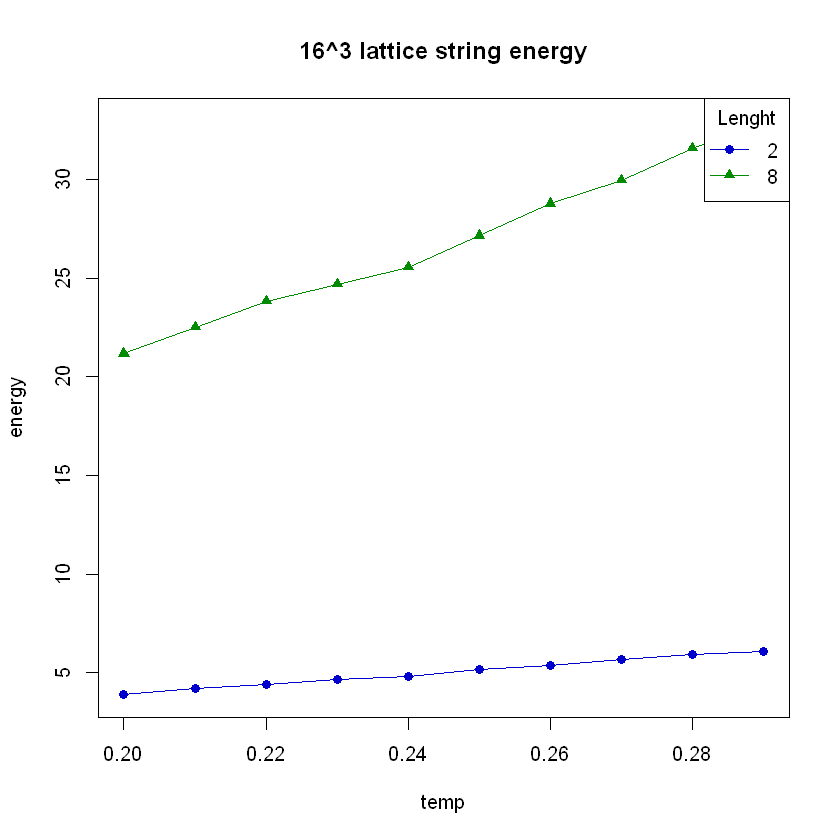

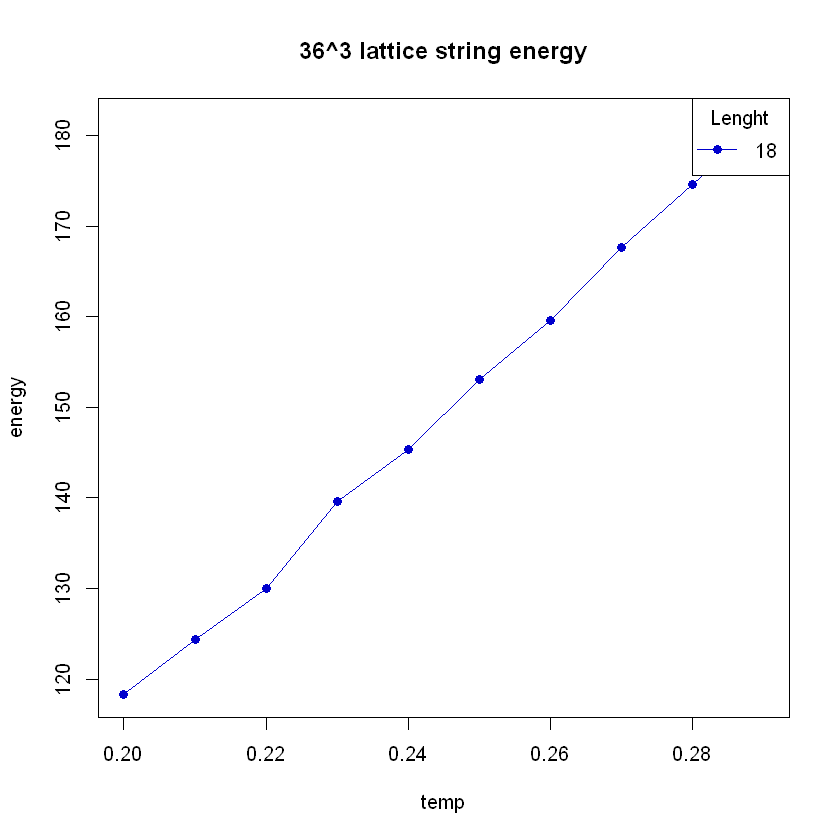

In [20]:
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)
ltys <- c(1, 1, 1, 1)

for (size in c(16, 36)) {
	d <- wilson[wilson$size == size & wilson$width %in% c(floor(size / 8), floor(size / 4), floor(size / 2), floor(size * 3 / 5)), ]

	plot(NULL, xlim = c(min(d$temp), max(d$temp)),
		ylim = c(min(d$energy), max(d$energy)),
		xlab = "temp", ylab = "energy")
	title(paste(size, "^3 lattice string energy", sep = ""))

	widths <- c()
	legend_cols <- c()
	legend_ltys <- c()
	legend_pchs <- c()
	for (i in 1:length(unique(d$width))) {
		width <- unique(d$width)[i]
		widths <- append(widths, width)
		lty <- ltys[i]
		legend_ltys <- append(legend_ltys, lty)
		col <- cols[i]
		legend_cols <- append(legend_cols, col)
		pch <- pchs[i]
		legend_pchs <- append(legend_pchs, pch)
		x <- d$temp[d$width == width]
		y <- d$energy[d$width == width]

		lines(x, y, col = col, lty = lty)
		points(x, y, col = col, pch = pch)
	}
	legend("topright", legend = widths, col = legend_cols, title = "Lenght", lty = legend_ltys, pch = legend_pchs)
}

In [25]:
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)
ltys <- c(1, 1, 1, 1)
sizes <- c(16, 24, 36, 54)

for (temp in c(0.26)) {
	d <- wilson[wilson$temp == temp, ]

	png(filename = paste("plots\\string_potential.png", sep = ""), width = 1440, height = 1440, type = c("cairo-png"), res = 200)
	plot(NULL, xlim = c(min(d$width), max(d$width)),
		ylim = c(min(d$energy_scaled), max(d$energy_scaled)),
		xlab = TeX("string length $r$"), ylab = TeX("string potential $V(r)$"))
	title(TeX(paste("String potential at $e^2 / 2 = ", temp, "$", sep = ""), bold = TRUE))

	legend_cols <- c()
	legend_ltys <- c()
	legend_pchs <- c()
	for (i in 1:length(sizes)) {
		size <- sizes[i]
		lty <- ltys[i]
		legend_ltys <- append(legend_ltys, lty)
		col <- cols[i]
		legend_cols <- append(legend_cols, col)
		pch <- pchs[i]
		legend_pchs <- append(legend_pchs, pch)
		x <- d$width[d$size == size]
		y <- d$energy_scaled[d$size == size]
		y_err <- d$energy_scaled_err[d$size == size]

		polygon(append(x, rev(x)), append(y + y_err, rev(y - y_err)), col = adjustcolor(col, alpha.f = 0.2), lty = 0)
		lines(x, y, col = col, lty = lty)
		points(x, y, col = col, pch = pch)
		axis(1, at = c(size), labels = c(size))
		lines(c(size, size), c(0, 100), lty = 3, col = adjustcolor("black", alpha.f = 0.8))
	}
	legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
	dev.off()

	png(filename = paste("plots\\string_potential_relative.png", sep = ""), width = 1440, height = 1440, type = c("cairo-png"), res = 200)
	plot(NULL, xlim = c(min(d$width_perc), max(d$width_perc)),
		ylim = c(min(d$energy_scaled), max(d$energy_scaled)),
		xlab = TeX("relative string length $r / L_x$"), ylab = TeX("string potential $V(r)$"))
	title(TeX(paste("Relative string potential at $e^2 / 2 = ", temp, "$", sep = ""), bold = TRUE))

	legend_cols <- c()
	legend_ltys <- c()
	legend_pchs <- c()
	for (i in 1:length(sizes)) {
		size <- sizes[i]
		lty <- ltys[i]
		legend_ltys <- append(legend_ltys, lty)
		col <- cols[i]
		legend_cols <- append(legend_cols, col)
		pch <- pchs[i]
		legend_pchs <- append(legend_pchs, pch)
		x <- d$width_perc[d$size == size]
		y <- d$energy_scaled[d$size == size]
		y_err <- d$energy_scaled_err[d$size == size]

		polygon(append(x, rev(x)), append(y + y_err, rev(y - y_err)), col = adjustcolor(col, alpha.f = 0.2), lty = 0)
		lines(x, y, col = col, lty = lty)
		points(x, y, col = col, pch = pch)
		axis(1, at = c(size), labels = c(size))
		lines(c(size, size), c(0, 100), lty = 3, col = adjustcolor("black", alpha.f = 0.8))
	}
	legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
	dev.off()
}

# String tension

In [26]:
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)
ltys <- c(1, 1, 1, 1)
sizes <- c(16, 24, 36, 54)

d <- read.csv("..\\data\\string_tension_results.csv", header = TRUE, sep = ",")
d <- d[d$bin_size == bin_size, ]
d$string_tension <- d$string_tension / d$size
d <- d[order(d$temp), ]

d16 <- d[d$size == 16, ]
d24 <- d[d$size == 24, ]
d36 <- d[d$size == 36, ]
d54 <- d[d$size == 54, ]

#d16
#d24
d36
#d54

dat <- rbind(d16, d24, d36, d54)

png(filename = paste("plots\\string_tension.png", sep = ""), width = 1440, height = 1440, type = c("cairo-png"), res = 200)
plot(NULL, xlim = c(0.2, 0.3), ylim = c(0.15, max(dat$string_tension)), xlab = TeX("coupling constant $e^2 / 2$"), ylab = TeX("string tension $\\sigma$"))
title("String tension")
for (i in 1:4) {
	size <- sizes[i]
	d <- dat[dat$size == size, ]
	points(d$temp, d$string_tension, col = cols[i], pch = pchs[i])
	lines(d$temp, d$string_tension, col = cols[i], lty = ltys[i])
}
legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
dev.off()

,index,temp,size,bin_size,string_tension,gamma,offset
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
124,6137,0.20,36,8,0.1957092,0,7767.261
130,6141,0.21,36,8,0.2065069,0,7765.665
136,6145,0.22,36,8,0.2174805,0,7762.486
142,6149,0.23,36,8,0.2296798,0,7758.384
148,6153,0.24,36,8,0.2438851,0,7750.632
154,6157,0.25,36,8,0.2579540,0,7741.183
160,6161,0.26,36,8,0.2698381,0,7730.181
166,6165,0.27,36,8,0.2795104,0,7717.035
172,6169,0.28,36,8,0.2946994,0,7696.381


png 
  2